# Antibiotic Resistance Database using AMRFinderPlus
This notebook is part of the analysis of the TotalRNA mRNA genes from Trinity. 

See more [here](https://github.com/ncbi/amr/wiki).

AMRFinderPlus identify acquired antimicrobial resistance genes in bacterial protein and/or assembled nucleotide sequences as well as known resistance-associated point mutations for several taxa. With AMRFinderPlus we added select members of additional classes of genes such as virulence factors, biocide, heat, acid, and metal resistance genes.

Note that AMRFinderPlus reports gene and point mutation presence/absence; it does not infer phenotypic resistance. Many of the resistance genes detected by AMRFinderPlus may not be relevant for clinical management or antimicrobial surveillance. See the Note regarding Genotype vs. Phenotype for more information.

## How to run Jupyter notebooks in huginn
<details>
<summary>Click to expand!</summary>

If you use vs-code you can use the [remote ssh extension](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-ssh) to connect to huginn and either run jupyterlab in the remote server (so to say, just like you would do in your local computer with `jupyter-lab`) or run directly without opening jupyterlab directly. 

Otherwise, you can follow the instructions below: 

1. Turn on VPN
2. Open two terminals (let's called A and B)
3. With terminal A, connect to huginn with ssh as usual
```bash
ssh username@huginn.au.dk
```
4. Move to the directory where you want to work, activate the conda enviroment and run jupyter notebook or jupyter lab:
```bash
conda activate jupyter-diamond
jupyter notebook --no-browser --port=7777
```
5. With terminal B, connect to huginn and forward the port specified port to your local computer
```bash
ssh -Y -N -L localhost:7777:localhost:7777 username@huginn.au.dk
```
6. Open your browser and go to `localhost:7777` and you should see the jupyter notebook running in huginn. You can also press in the url of Terminal A. 

Troubleshooting:
- If you get an error like `bind: Address already in use` it means that you have another jupyter notebook running in the same port. You can either kill the process or change the port.
</details>

## How to create a new environment for this notebook (if needed)

We will use Singuliarty, a few python basic libraries and bash. Let's check if those dependencies are installed. If not, you can install them with mamba (as well with jupyterlab)

```bash
# To create a new environment with mamba
mamba create -c bioconda -c conda-forge singularity pandas matplotlib jupyterlab -n jupyter-diamond
# To activate the environment
conda activate jupyter-diamond
```

### Sanity check

In [1]:
%%bash
singularity --version
python -c "import pandas; print(pandas.__version__)"
python -c "import matplotlib; print(matplotlib.__version__)"
bash --version | head -n 1

2.4.2-dist


2.1.1
3.8.0
GNU bash, version 4.4.20(1)-release (x86_64-pc-linux-gnu)


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Input files (edit this chunk)
Edit this chunk to match your input files

In [3]:
trinity_file = '../data/contigs.fasta'
count_table = '../data/mapped_reads_to_contigs.tsv'

In [4]:
## Sanity check: trinity and count table exit
assert os.path.exists(trinity_file), 'Trinity file does not exist'
assert os.path.exists(count_table), 'Count table does not exist'

### Output files (edit this chunk)
Edit this chunk to match your desired output files

In [5]:
outfile_matches = '../results/amrfinder_matches.tsv'

### Database files
Don't edit this chunk

In [6]:
singularity = "/software/singularities/ncbi_amr.simg"
assert os.path.exists(singularity), 'Singularity file does not exist'

In [7]:
%%bash -s "$singularity"
singularity exec $1 amrfinder --version

3.11.20


##### Run amrfinder

We will use default parameters:

In [8]:
%%bash -s "$singularity" "$trinity_file" "$outfile_matches"
if [ ! -f $3 ]; then
singularity exec --bind $(pwd) $1 amrfinder -n $2 --threads 8 > $3 
fi
head $3

Running: amrfinder -n ../data/contigs.fasta --threads 8
Software directory: '/usr/local/bin/'
Software version: 3.11.20


Database directory: '/usr/local/bin/data/2023-09-26.1'
Database version: 2023-09-26.1
AMRFinder translated nucleotide search
  - include -O ORGANISM, --organism ORGANISM option to add mutation searches and suppress common proteins
Running blastx
Making report
AMRFinder took 1 seconds to complete


Protein identifier	Contig id	Start	Stop	Strand	Gene symbol	Sequence name	Scope	Element type	Element subtype	Class	Subclass	Method	Target length	Reference sequence length	% Coverage of reference sequence	% Identity to reference sequence	Alignment length	Accession of closest sequence	Name of closest sequence	HMM id	HMM description
NA	TRINITY_DN2264898_c0_g1_i1	1	858	+	blaSHV-52	inhibitor-resistant broad-spectrum class A beta-lactamase SHV-52	core	AMR	AMR	BETA-LACTAM	BETA-LACTAM	ALLELEX	286	286	100.00	100.00	286	WP_063864691.1	inhibitor-resistant broad-spectrum class A beta-lactamase SHV-52	NA	NA


##### Preprocessing diamond matches
We read the file into a pandas table:

In [9]:
amrfinder = pd.read_csv(outfile_matches, delimiter='\t',comment='#')
amrfinder

,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,Element subtype,...,Method,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description
0,NaN,TRINITY_DN2264898_c0_g1_i1,1,858,+,blaSHV-52,inhibitor-resistant broad-spectrum class A bet...,core,AMR,AMR,...,ALLELEX,286,286,100.0,100.0,286,WP_063864691.1,inhibitor-resistant broad-spectrum class A bet...,NaN,NaN


We also add the count table into a Pandas data frame:

In [10]:
counts = pd.read_csv(
    count_table, sep = "\t", comment='#'
).set_index('ContigID')
counts

,SampleA,SampleB,SampleC,SampleD,SampleE
ContigID,,,,,
TRINITY_DN226500_c0_g1_i1,0,0,2,1,0
TRINITY_DN226510_c0_g1_i1,1,0,0,0,5
TRINITY_DN226477_c0_g1_i1,0,0,0,0,0
TRINITY_DN226449_c0_g1_i1,0,0,2,0,0
TRINITY_DN226457_c0_g1_i1,3,6,0,0,0
TRINITY_DN226454_c0_g1_i1,0,0,0,9,0
TRINITY_DN226455_c0_g1_i1,0,2,0,0,2
TRINITY_DN2264898_c0_g1_i1,0,2,1,1,2


We have no E-value. Instead, we would choose for every contig with the highest % Identity to reference sequence. 

array([[<Axes: title={'center': '% Identity to reference sequence'}>]],
      dtype=object)

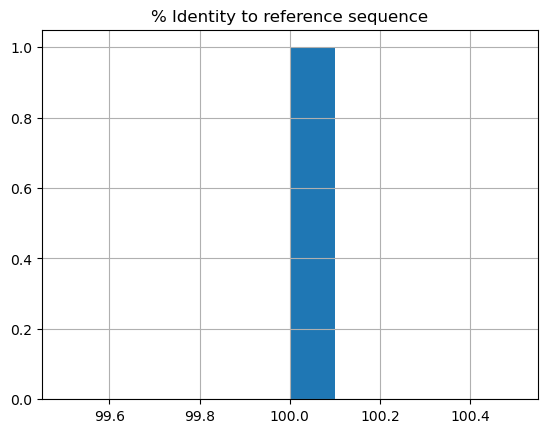

In [11]:
amrfinder.hist("% Identity to reference sequence")


Now, we will sort rows per e-value and score and get the most significant hit per each ContigId.

Text(0.5, 1.0, 'Number of hits per contig before preprocessing')

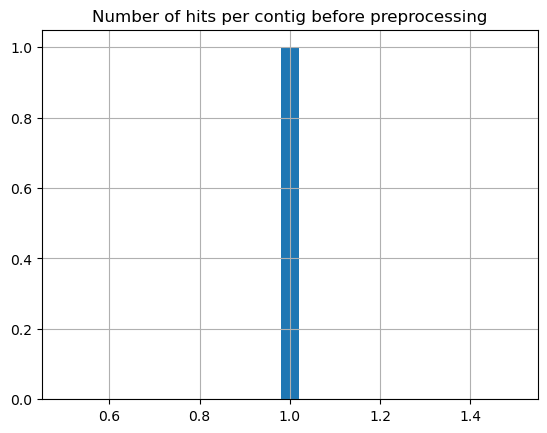

In [12]:
amrfinder.pivot_table(columns=['Contig id'], aggfunc='size').hist(bins = 25)
plt.title("Number of hits per contig before preprocessing")


Number of rows. Before: 1. After: 1


Text(0.5, 1.0, 'Number of hits per contig after preprocessing')

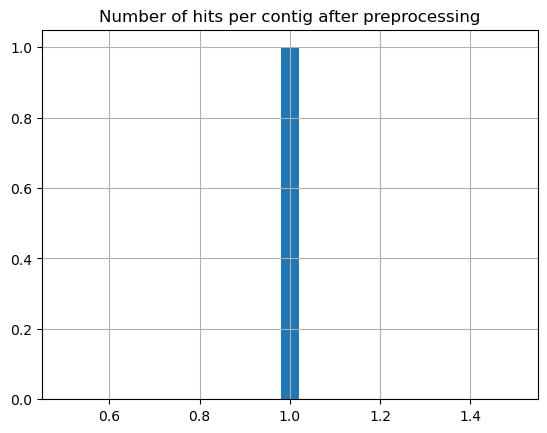

In [13]:
before = amrfinder.shape[0]
amrfinder = amrfinder.sort_values(
        by=['% Identity to reference sequence'], ascending=False
        ).drop_duplicates(
    'Contig id', keep='first'
).set_index('Contig id')
after = amrfinder.shape[0]

print(f"Number of rows. Before: {before}. After: {after}")

amrfinder.pivot_table(columns=['Contig id'], aggfunc='size').hist(bins = 25)
plt.title("Number of hits per contig after preprocessing")

#####  Inspect % identity and aligment length

Text(0.5, 1.0, 'Alignment length distribution after preprocessing')

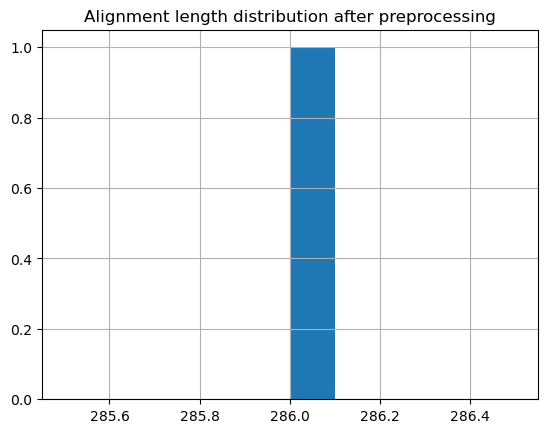

In [14]:
amrfinder.hist("Alignment length")
plt.title("Alignment length distribution after preprocessing")


##### Link information form AMR-Finder matches and count table

Now, we will merge both files by their column in common:

In [15]:
# Select from amrfinder the columns that we want to keep
# Protein identifier, Gene symbol, Sequence name, Score, Element type, Class, Mechanism, Group, Resistance, Antimicrobial, Resistance, Antimicrobial, Resistance, Antimicrobial, Alignment length, % Identity to reference sequence, % Query coverage, Contig id, Start position, Stop position, Accession, Sequence name, Sequence length, Sequence
amrfinder = amrfinder.loc[:, ['Protein identifier', 'Gene symbol', 'Sequence name', 'Scope', 'Element type', 'Element subtype', 'Class', 'Subclass']]  # Retorna un nuevo DataFrame con las columnas seleccionadas
df = counts.merge(amrfinder, left_index=True, right_index=True, how = 'right')
df


,SampleA,SampleB,SampleC,SampleD,SampleE,Protein identifier,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass
Contig id,,,,,,,,,,,,,
TRINITY_DN2264898_c0_g1_i1,0,2,1,1,2,NaN,blaSHV-52,inhibitor-resistant broad-spectrum class A bet...,core,AMR,AMR,BETA-LACTAM,BETA-LACTAM


##### Aggregate table
Now, we are going to aggregate the rows by grouping them by "Subject id" (notice the difference in rows between the previous table and the following):

In [16]:
df = df.groupby('Sequence name').sum(numeric_only = False)
df

,SampleA,SampleB,SampleC,SampleD,SampleE,Protein identifier,Gene symbol,Scope,Element type,Element subtype,Class,Subclass
Sequence name,,,,,,,,,,,,
inhibitor-resistant broad-spectrum class A beta-lactamase SHV-52,0,2,1,1,2,0.0,blaSHV-52,core,AMR,AMR,BETA-LACTAM,BETA-LACTAM


Finally, we save the table and remove the temporary files:

In [17]:
df.to_csv('../results/amrfinder_matches_annotated.tsv', sep='\t')